Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

#### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random as python_random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/수업/wine.csv', header=None)

# 데이터 미리보기
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [3]:
# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
# 모델 구조 설정
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.summary()

In [5]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델 실행
# history = model.fit(X_train, y_train, epochs=200, batch_size=200, validation_split=0.25, verbose=0)
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0) # 검증셋 0.8 * 0.25 = 0.2

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
# print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[0.16634196043014526, 0.9399999976158142]
Test loss: 0.16634196043014526
Test accuracy: 0.9399999976158142


In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random as python_random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/수업/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조 설정
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
# history = model.fit(X_train, y_train, epochs=200, batch_size=200, validation_split=0.25, verbose=0)
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0) # 검증셋 0.8 * 0.25 = 0.2

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Test loss: 0.16634196043014526
Test accuracy: 0.9399999976158142


#### .keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 저장의 조건을 설정
modelpath = '/content/drive/MyDrive/수업/model/all/{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)      # ,monitor='val_loss', save_best_only=True

# 모델을 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/수업/model/all/01-0.9323.keras

Epoch 2: saving model to /content/drive/MyDrive/수업/model/all/02-0.9331.keras

Epoch 3: saving model to /content/drive/MyDrive/수업/model/all/03-0.9308.keras

Epoch 4: saving model to /content/drive/MyDrive/수업/model/all/04-0.9338.keras

Epoch 5: saving model to /content/drive/MyDrive/수업/model/all/05-0.9323.keras

Epoch 6: saving model to /content/drive/MyDrive/수업/model/all/06-0.9338.keras

Epoch 7: saving model to /content/drive/MyDrive/수업/model/all/07-0.9338.keras

Epoch 8: saving model to /content/drive/MyDrive/수업/model/all/08-0.9346.keras

Epoch 9: saving model to /content/drive/MyDrive/수업/model/all/09-0.9338.keras

Epoch 10: saving model to /content/drive/MyDrive/수업/model/all/10-0.9346.keras

Epoch 11: saving model to /content/drive/MyDrive/수업/model/all/11-0.9338.keras

Epoch 12: saving model to /content/drive/MyDrive/수업/model/all/12-0.9354.keras

Epoch 13: saving model t

In [ ]:
# # 테스트 결과를 출력
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

#### History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [14]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴 수 있음)
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

In [15]:
# Print the keys of the history object to understand what metrics are available
print(history.history.keys())

# To access a specific metric, for example, the training loss, you can do:
print(history.history['loss'])

# If you also have validation metrics, you can access them like this:
print(history.history['val_loss'])      # For validation loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.13058429956436157, 0.1310095191001892, 0.13138975203037262, 0.12948545813560486, 0.1321655511856079, 0.13071903586387634, 0.1321723759174347, 0.12746404111385345, 0.12532386183738708, 0.12708459794521332, 0.12571664154529572, 0.12375123053789139, 0.1230151578783989, 0.12178436666727066, 0.12137571722269058, 0.12072654813528061, 0.12016074359416962, 0.12039149552583694, 0.11880754679441452, 0.1206638291478157, 0.11743567883968353, 0.11724129319190979, 0.11630036681890488, 0.11545376479625702, 0.11518821120262146, 0.11439556628465652, 0.11414240300655365, 0.1137080267071724, 0.11380694806575775, 0.11322429776191711, 0.11138704419136047, 0.11107201874256134, 0.11041326075792313, 0.11049122363328934, 0.1092994436621666, 0.11036869138479233, 0.1084180623292923, 0.1077333390712738, 0.10781676322221756, 0.10685122758150101, 0.1075800359249115, 0.10781001299619675, 0.1078900620341301, 0.10574605315923691, 0.10597134381532669, 0.099

In [16]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.130584,0.952014,0.130970,0.949231
1,0.131010,0.955094,0.128787,0.944615
2,0.131390,0.950731,0.127585,0.949231
3,0.129485,0.951245,0.130339,0.950769
4,0.132166,0.952784,0.127695,0.946923


In [ ]:
hist_df.shape

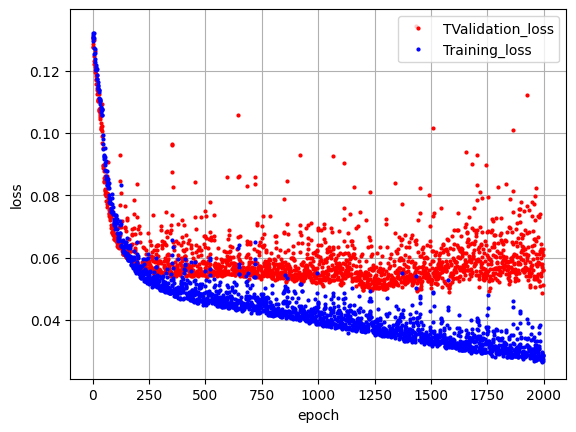

In [28]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']
# x값을 지정
x_len = np.arange(len(y_loss))

# 테스트셋(검증셋)의 오차를 빨강, 학습셋의 오차를 파랑으로 표시
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='TValidation_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Training_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

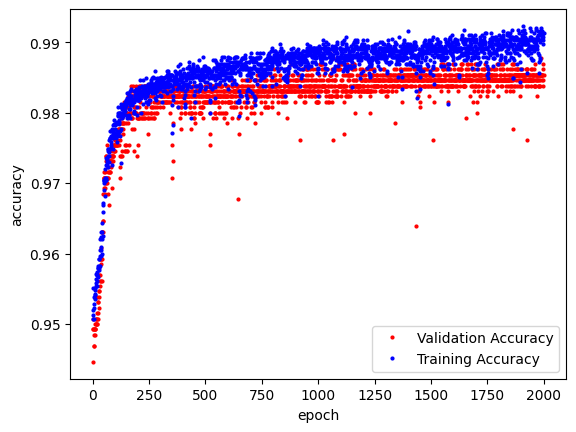

In [30]:
# history 객체에서 학습셋과 검증셋의 데이터를 시각화
# 'acc' 대신 'accuracy'를 사용해야 될 수 있음(버전에 따라 다름)

# y_val_acc에 테스트셋(여기서는 검증셋)의 정확도를 저장
y_val_acc = hist_df['val_accuracy']
# y_acc에 학습셋의 정확도를 저장
y_acc = hist_df['accuracy']
# x값을 지정
x_len = np.arange(len(y_acc))

# 테스트셋(검증셋)의 오차를 빨강, 학습셋의 오차를 파랑으로 표시
plt.plot(x_len, y_val_acc, 'o', c='red', markersize=2, label='Validation Accuracy')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=2, label='Training Accuracy')

# 범례와 축 라벨 추가 후 시각화
plt.legend(loc='lower right')
# plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### 학습의 자동 중단

In [5]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import random as python_random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/수업/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

##### [ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

##### 학습의자동중단 및 최적화 모델 저장

In [6]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 최적화 모델이 저장될 폴더와 모델의 이름을 입력
modelpath = '/content/drive/MyDrive/수업/model/bestmodel.keras'

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)

# 모델을 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.2471 - loss: 21.1895
Epoch 1: val_loss improved from inf to 14.92810, saving model to /content/drive/MyDrive/수업/model/bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.2473 - loss: 20.9778 - val_accuracy: 0.2115 - val_loss: 14.9281
Epoch 2/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2220 - loss: 14.6941
Epoch 2: val_loss improved from 14.92810 to 8.06012, saving model to /content/drive/MyDrive/수업/model/bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2111 - loss: 12.6846 - val_accuracy: 0.1546 - val_loss: 8.0601
Epoch 3/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1600 - loss: 7.9118
Epoch 3: val_loss improved from 8.06012 to 2.52028, saving model to /content/drive/MyDrive/수업/model/bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1401 - loss: 6.4213 - val_accuracy: 0.1331 - val_loss: 2.5203
Epoch 4/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [7]:
# 테스트 결과를 출력합니다.
score = model.evaluate(X_test, y_test)
print('Test Accuracy', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9914 - loss: 0.0335
Test Accuracy 0.9876922965049744


In [8]:
# 저장된 모델을 로드
from tensorflow.keras.models import load_model

# 저장된 모델 로드
best_model_path = '/content/drive/MyDrive/수업/model/bestmodel.keras'
model = load_model(best_model_path)

# 모델 요약 출력(선택 사항)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)